<a href="https://colab.research.google.com/github/akshay-seetharam/Computer-VIsion-2022-23/blob/main/ImagesAndPixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

First, let's define a function that lets you load images from disk. Note that you must upload these images each time you start a Colab session; to do so, click on the folder icon on the left sidebar, and drag/drop the file into the sample_data directory. 

In [2]:
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)

    # Convert the image to be in the range (0, 1)
    out = out.astype(np.float64) / 255
    return out

Next, we'll load two sample images and test that we can display them.

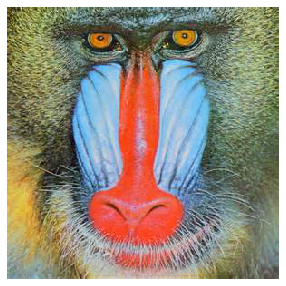

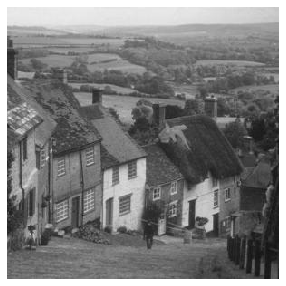

In [3]:
# You can change these paths to point to your own images if you want to try them out for fun.
# If you do, you must include these image files in your submission.
image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

## Exercise 1: dimming

Recall from lecture that the value of each pixel represents its brightness. Implement a function that takes in an image and returns the same image, but half as bright as the original image.

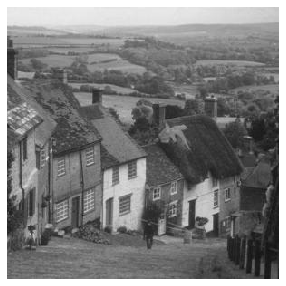

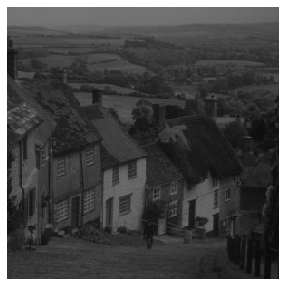

In [4]:
def dim_image(img):
    '''img is an image, represented as a 2D numpy array.'''
    img /= 2
    # YOUR CODE GOES HERE
    out = img
    # END YOUR CODE
    return out

display (image2)
dim_image2 = dim_image(image2)
display (dim_image2)

## Exercise 2: convert to gray scale

Implement a function that takes in an RGB color image and outputs that same image in grayscale.

Hint: You may want to look at the documentation for skimage.color to see if there is something useful there.

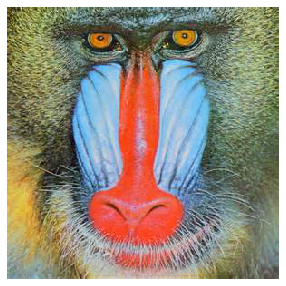

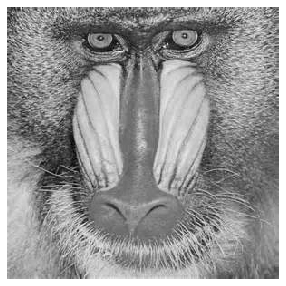

In [5]:
import skimage

def convert_to_grayscale(img):
    '''img is an RGB image, represented as a 2D numpy array.'''
    # YOUR CODE GOES HERE
    out = skimage.color.rgb2gray(img)
    # END YOUR CODE
    return out
    
display(image1)
grey_image = convert_to_grayscale(image1)
display(grey_image)

## Exercise 3: RGB exclusion

In the video we watched, we saw that you can represent a color image with a 2-dimensional array of pixels, where the R, G, and B pixels are grouped next to each other, and that this is how LCD screens are implemented.

In numpy, the representation is slightly different -- instead of having one 2-dimensional array, we have 3, and each one represents the brightness of the R, G, and B channels.

Implement a function that takes in an image and a channel, and returns an image without the specified channel.

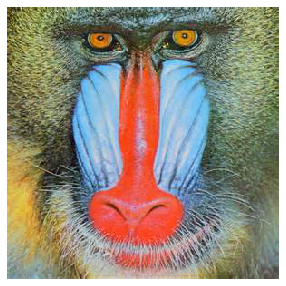

(300, 300, 3)
Below is the image without the red channel.


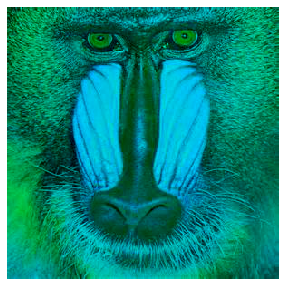

Below is the image without the green channel.


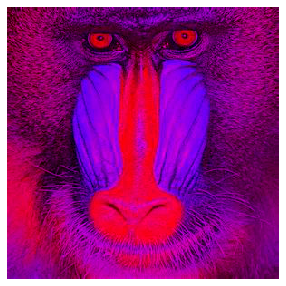

Below is the image without the blue channel.


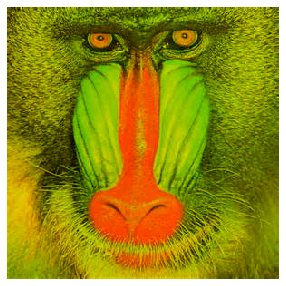

In [6]:
def zero_out(image, channel):
    img = image.copy()
    i = 0
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            img[i][j][channel] = 0
            j += 1
        i += 1

    return img

def rgb_exclusion(image, channel):
    """Return image **excluding** the rgb channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "R", "G" or "B".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    ### YOUR CODE GOES HERE

    if channel == 'R':
        return zero_out(image, 0)
    elif channel == 'G':
        return zero_out(image, 1)
    elif channel == 'B':
        return zero_out(image, 2)
    else:
        raise Exception('channel: str specifying the channel. Can be either "R", "G" or "B".')
    ### END YOUR CODE


# You can change these paths to point to your own images if you want to try them out for fun.
# If you do, you must include these image files in your submission.
image1_path = './image1.jpg'
    
image1 = load(image1_path)

display(image1)

without_red = rgb_exclusion(image1, 'R')
image1 = load(image1_path)
without_blue = rgb_exclusion(image1, 'B')
image1 = load(image1_path)
without_green = rgb_exclusion(image1, 'G')

print(image1.shape)

print("Below is the image without the red channel.")
display(without_red)

print("Below is the image without the green channel.")
display(without_green)

print("Below is the image without the blue channel.")

display(without_blue)

## Advanced exercise #1: LAB color space

RGB is not the only way that we can represent colors. In this advanced exercise, we'll explore the LAB and HSV color spaces.

Implement a function that takes in an image and an LAB channel, and returns an image without the specified channel. Again, you may want to look at the skimage.color module to see if there's something in there that can help you.

------------------------------------------
------------------------------------------
This code was debugged with significant help from Owen Hsu (Class of 2023), who pointed out I should use image.copy() (which worked) in the function and suggested normalization as a possible fix (though that didn't end up working).
------------------------------------------
------------------------------------------


/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 18871 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


Below is the image without the L channel.


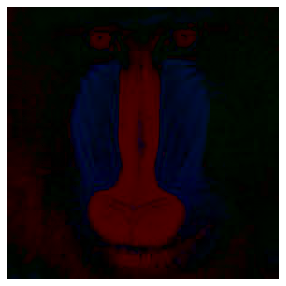

Below is the image without the A channel.


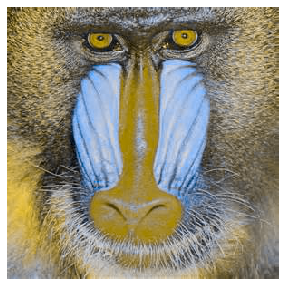

Below is the image without the B channel.


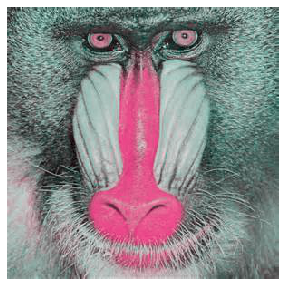

In [7]:
# DEBUGGED WITH SIGNIFICANT ASSISTANCE FROM OWEN HSU (CLASS OF 2023)
print("------------------------------------------")
print("------------------------------------------")
print("This code was debugged with significant help from Owen Hsu (Class of 2023), who pointed out I should use image.copy() (which worked) in the function and suggested normalization as a possible fix (though that didn't end up working).")
print("------------------------------------------")
print("------------------------------------------")

import numpy as np

def labzero_out(image, channel):
    img = image.copy()
    i = 0
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            img[i][j][channel] = 0
            j += 1
        i += 1

    return img

def lab_exclusion(image, channel):
    """Return image **excluding** the lab channel specified

    Args:
        image: numpy array of shape(image_height, image_width, 3).
        channel: str specifying the channel. Can be either "L", "A" or "B".

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    ### YOUR CODE GOES HERE

    image = image.copy()

    if channel == 'L':
        return skimage.color.lab2rgb(labzero_out(image, 0))
    elif channel == 'A':
        return skimage.color.lab2rgb(labzero_out(image, 1))
    elif channel == 'B':
        return skimage.color.lab2rgb(labzero_out(image, 2))
    else:
        raise Exception('channel: str specifying the channel. Can be either "L", "A" or "B".')

image_1 = skimage.color.rgb2lab(image1)
# image_1 /= np.max(image_1) / [100, 255, 255]
# image_1 -= [0, 128, 128]

image_l = lab_exclusion(image_1, 'L')
image_a = lab_exclusion(image_1, 'A')
image_b = lab_exclusion(image_1, 'B')


print("Below is the image without the L channel.")
display(image_l)

print("Below is the image without the A channel.")
display(image_a)

print("Below is the image without the B channel.")
display(image_b)

## Advanced exercise 1a

Explain what the L, A and B channels are and what happens when you take away the L and A channels.

# ***Akshay's Answer***
L: lightness
A: red/green hues
B: blue/yellow hues

Taking away L makes the image darker.
Taking away A makes the image look bright blue and yellow.
Taking away B makes the image look bright red and green.


## Advanced exercise 2: HSV exploration

Explain what the H, S and V channels are and what happens when you take away the both the H and S channels.

It may help you to implement a function that performs HSV decomposition and removes these channels; this is optional.

# ***Akshay's Answer***
H: Hue
S: Saturation
V: Value

Taking away the hue and saturation will result in a purely greyscale image where the only variation is a result of differences in value (dark/light).

## Advanced exercise 3: combining images

Implement the following method, which takes in two images and returns a new image where the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Exclude the specified channel for the given image. 

You should see the left half of the monkey without the red channel and the right half of the house image with no green channel.

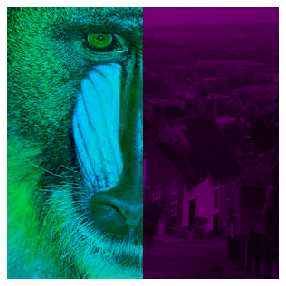

In [8]:
def mix_images(image1, image2, channel1, channel2):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        image2: numpy array of shape(image_height, image_width, 3).
        channel1: str specifying channel used for image1.
        channel2: str specifying channel used for image2.

    Returns:
        out: numpy array of shape(image_height, image_width, 3).
    """
    ### YOUR CODE GOES HERE
    out = np.concatenate([rgb_exclusion(image1[:,:150], channel1), rgb_exclusion(image2[:,150:], channel2)], axis=1)
    ### END YOUR CODE

    return out

image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)


## Advanced exercise 4: exploration

Implement a function that takes a single image, and performs a different operation to each of the 4 quadrants of the image, returning an image that merges the 4 quadrants back together.

For example, you might remove a channel or two from one quadrant, dim or brighten another quadrant, etc.

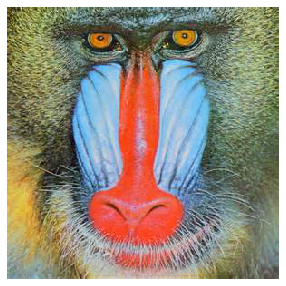

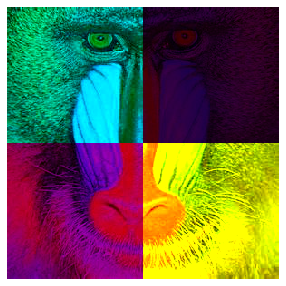

In [47]:
def quarterize(image, channel_exclusions, brightness_factor):
    """
    Args:
        image1: numpy array of shape(image_height, image_width, 3).
        channel_exclusions: list of channels to exclude, one for each quadrant in order nw, ne, se, sw
        brightness_factor: factor to brighten the image in order nw, ne, se, sw
    """
    height = image.shape[0]
    width = image.shape[1]
    
    image[:int(height/2), :int(width/2)] = rgb_exclusion(image[:int(height/2), :int(width/2)], channel_exclusions[0])
    image[:int(height/2), :int(width/2)] *= brightness_factor[0]
    
    image[:int(height/2), int(width/2):] = rgb_exclusion(image[:int(height/2), int(width/2):], channel_exclusions[1])
    image[:int(height/2), int(width/2):] *= brightness_factor[1]

    image[int(height/2):, int(width/2):] = rgb_exclusion(image[int(height/2):, int(width/2):], channel_exclusions[2])
    image[int(height/2):, int(width/2):] *= brightness_factor[2]

    image[int(height/2):, :int(width/2)] = rgb_exclusion(image[int(height/2):, :int(width/2)], channel_exclusions[3])
    image[int(height/2):, :int(width/2)] *= brightness_factor[3]

image1 = load(image1_path)
display(image1)
quarterize(image1, ['R', 'G', 'B', 'G'], [1.2, 0.3, 1.9, 0.8])
display(image1)